# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

### Homework problems:

<ol start=0>
    <li>Follow the link to the <tt>qmsolve</tt> GitHub page above. Click the link for the <tt>examples</tt> folder, then click on the <tt>eigenstate solver examples</tt> folder. Finally, click on <tt>1D_harmonic_oscillator.py</tt> to see a short code snippet that will calculate wavefunctions for a simple harmonic oscillator (SHO).</li>
    <li><tt>1D_harmonic_oscillator.py</tt> imports the <tt>Hamiltonian</tt> class from <tt>qmsolve</tt>. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.</li>
    <li>Which force law is defined in the function <tt>harmonic_oscillator()</tt>?</li>
    <li>What are the eigenstates referred to in lines 22 and 23 in <tt>1D_harmonic_oscillator.py</tt>? Again, please use multiple sources to formulate your answer and cite those sources.
    <li>Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.</li>
</ol>

Note: you can write your answers to the non-code problems in a markdown cell. From within a new notebook cell, click the box with a double arrow that says "Code" and change to "Markdown". Then you can just type in the cell like a regular text file.

Answer 1.) A Hamiltonian is an operator of the total energy of a quantum system. It is defined as the sum of the kinetic and potential energies of a system (H = KE + PE). The Hamiltonian operator acts on the wavefunction of the system and gives the total energy of the system as an eigenvalue of the operator. A wavefunction's change with time of the system is determined by the Schrödinger equation, which involves the Hamiltonian operator. The system's set of energy eigenvalues, is the set of possible outcomes obtainable from a measurement of the system's total energy.

References:
https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics)
http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hamil.html


Answer 2.) It's the potential force of the harmonic oscillator:

V(x) = 1/2 * k * x^2

where k is the spring constant and x is the displacement. This potential energy function leads to a force that is proportional to displacement, which is Hooke's law.

Answer 3.) 

The eigenstates are stationary states of a system that do not vary with time. They are a multiple of the original wavefunction and given by solutions to the Schrödinger equation for the system. In the code below, The H.solve(max_states = 30) method computes 30 eigenstates of the system. The eigenstates can be used to compute behaviors and properties of the system such as probabilities.

References:
https://phys.libretexts.org/Bookshelves/Quantum_Mechanics/Introductory_Quantum_Mechanics_(Fitzpatrick)/03%3A_Fundamentals_of_Quantum_Mechanics/3.08%3A_Eigenstates_and_Eigenvalues
https://physics.stackexchange.com/questions/485299/what-are-the-eigenstates-and-eigenvalues

Answer 4.) See code and outputs below for plots of my five SHO eigenstates.

In [19]:
# PHYS309 - HW6
# Michael Kaehler

import numpy as np
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install qmsolve

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV

Computing...
Took 0.007994890213012695
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


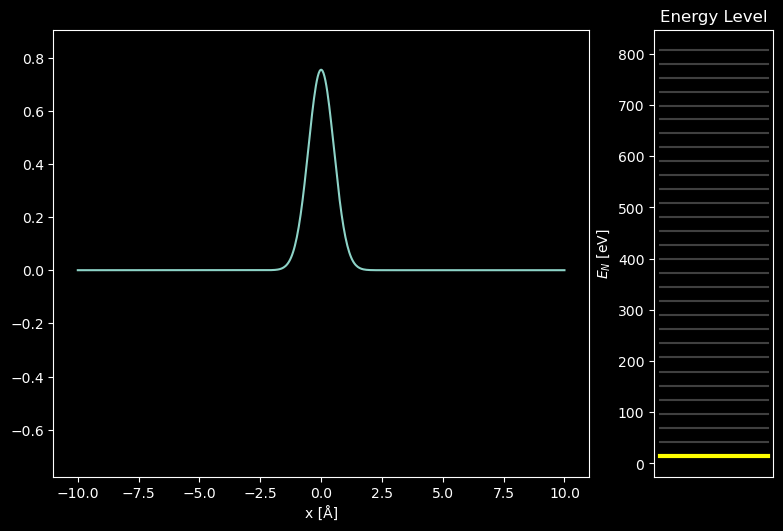

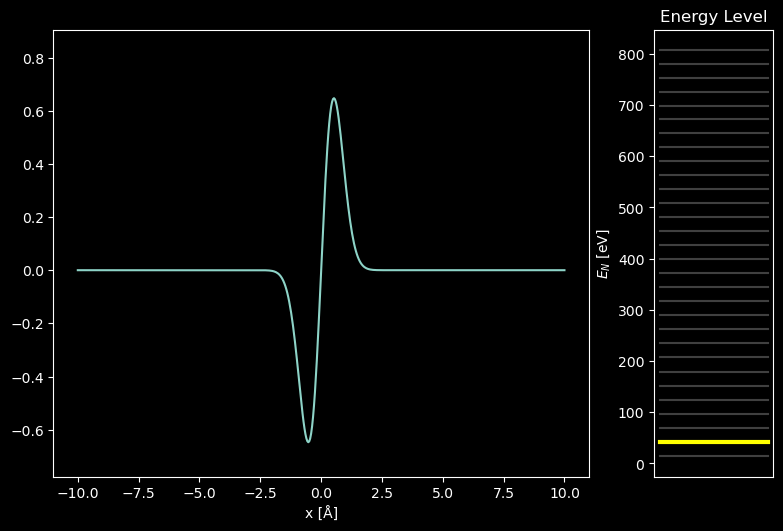

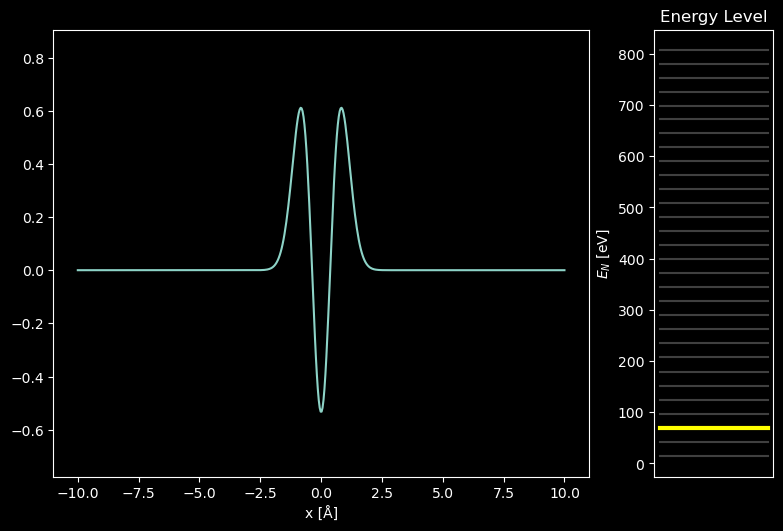

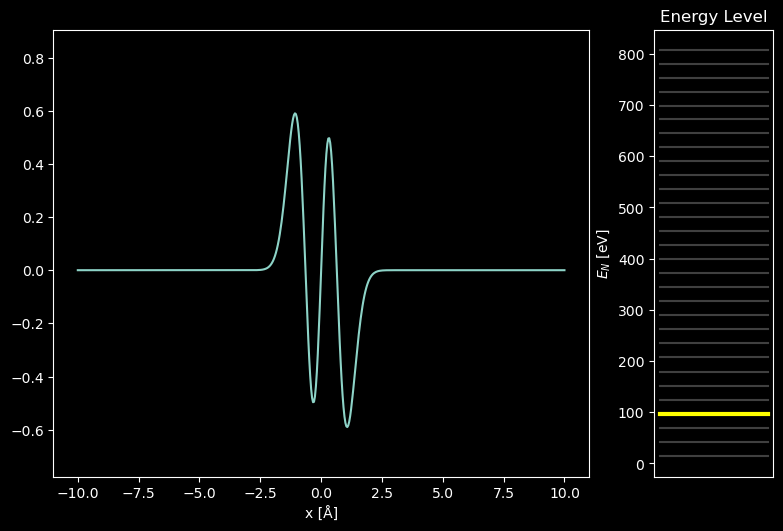

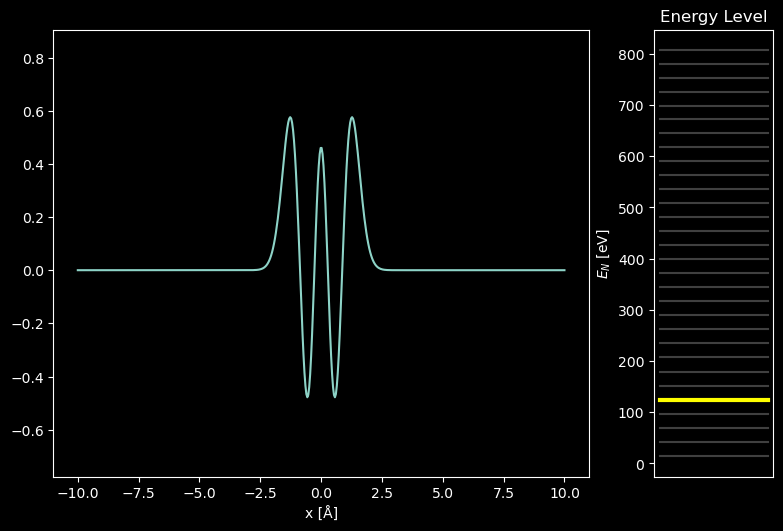

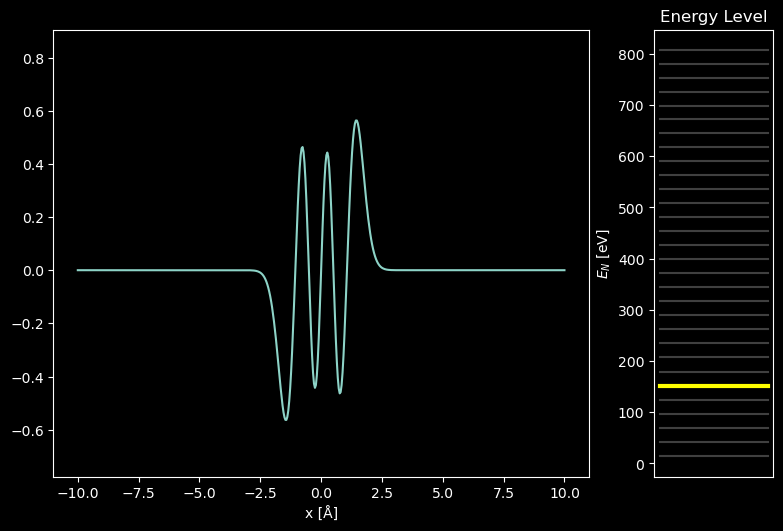

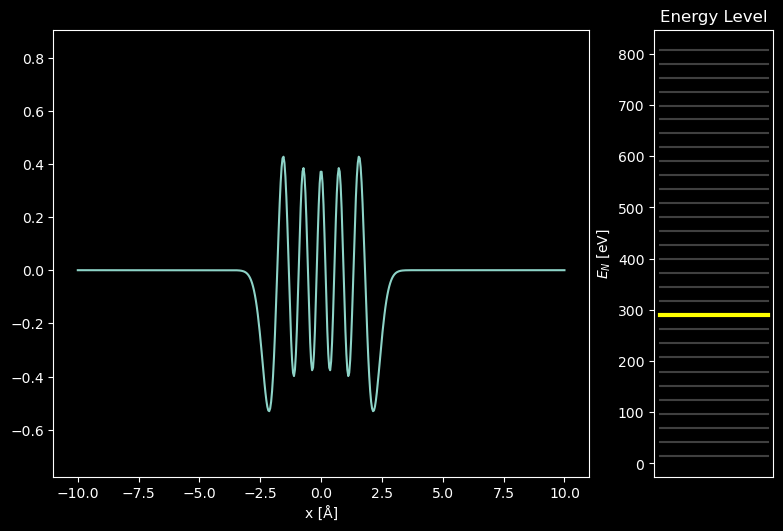

In [20]:
# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0)

# Answer to Question 4.) number of cycles (frequency) and energy level increases with each eigenstate value.
visualization.plot_eigenstate(1)
visualization.plot_eigenstate(2)
visualization.plot_eigenstate(3)
visualization.plot_eigenstate(4)
visualization.plot_eigenstate(5)
visualization.plot_eigenstate(10)

<ol start=5>
    <li>What is on the x-axis of your plots?</li>
    <li>Are your plots showing wave functions $\psi(x)$ or probability functions $\psi^*(x) \psi(x)$? How do you know?</li>
</ol>

### New potential: infinite square well

Below I define the infinite square well potential and plot the two lowest-energy eigenstates (compare to Figure 6.3 in your textbook).

Answer 5.) Particle's position "x" in angstroms (Å). One angstrom equals 1e-10 meters.

Answer 6.) They are showing wave functions, probability functions cannot be negative since they are absolute valued and squared.

Computing...
Took 0.006577968597412109
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


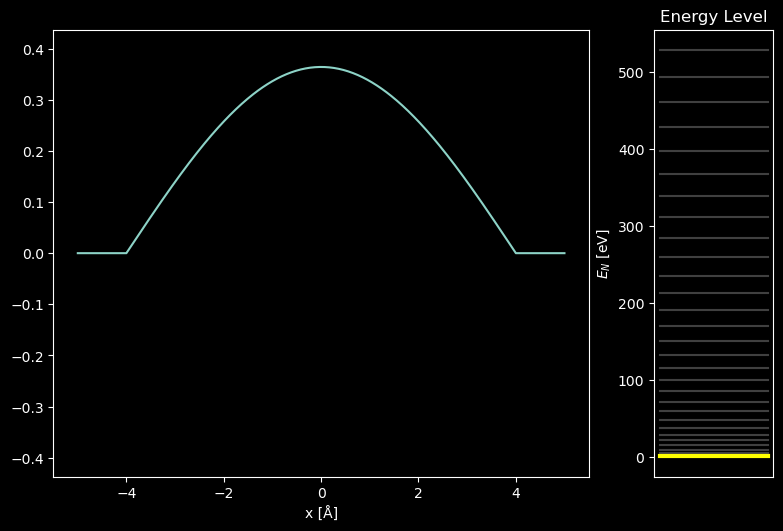

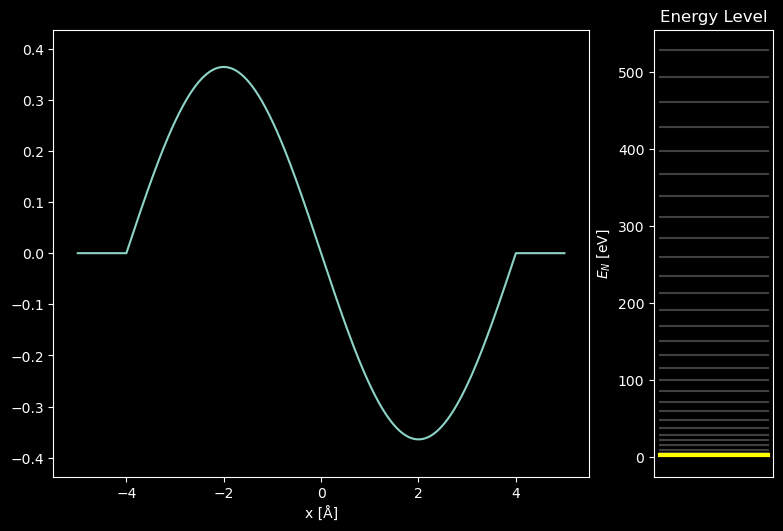

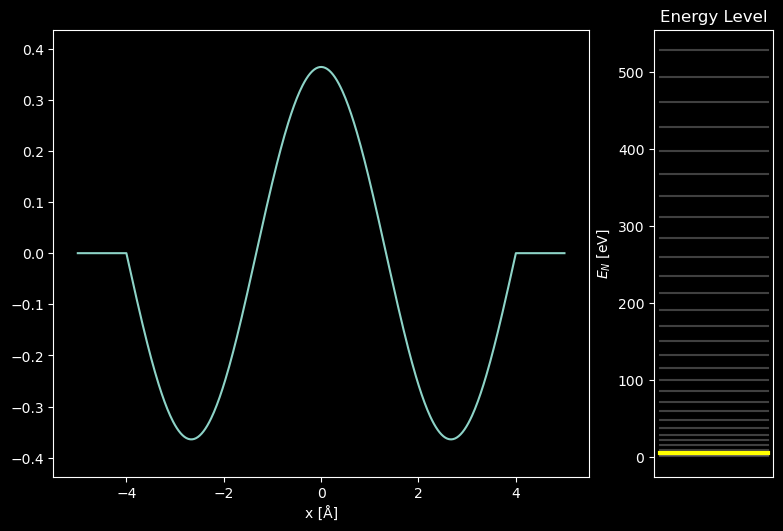

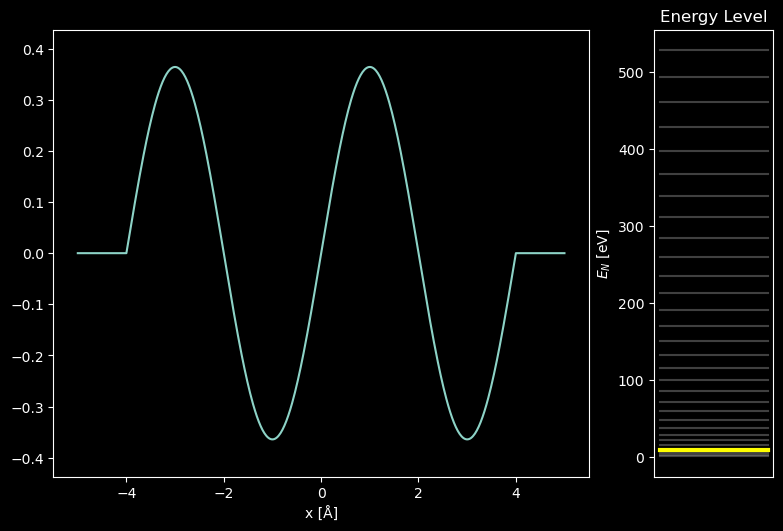

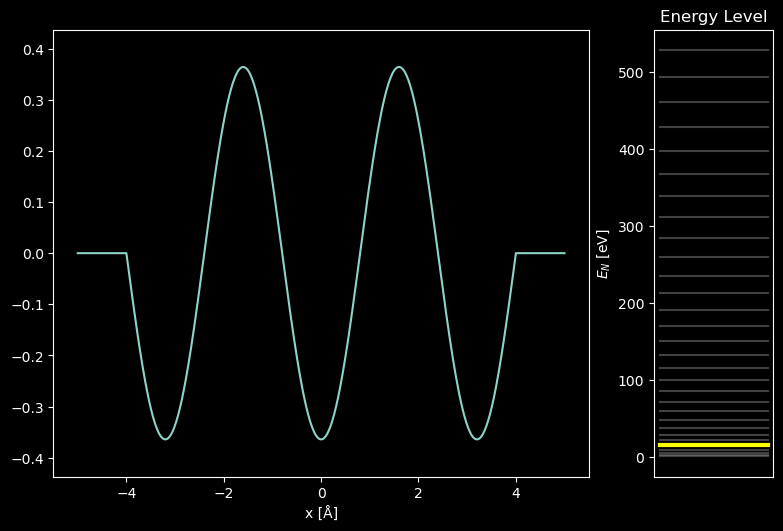

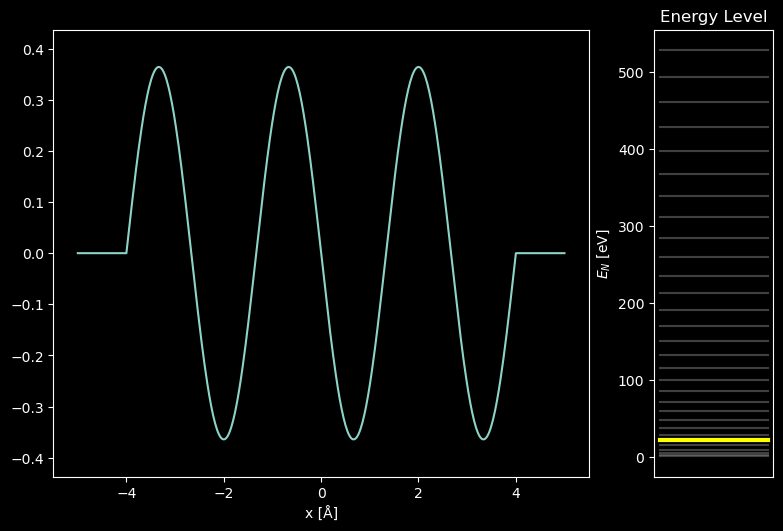

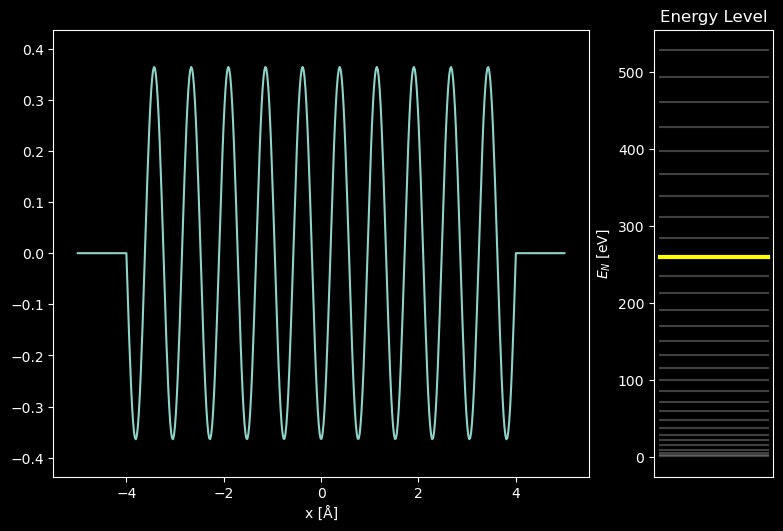

In [37]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)

# Answer to Question 7.)
visualization_sw.plot_eigenstate(2)
visualization_sw.plot_eigenstate(3)
visualization_sw.plot_eigenstate(4)
visualization_sw.plot_eigenstate(5)
visualization_sw.plot_eigenstate(20)

<ol start=7>
    <li>Plot any three infinite square well eigenstates of your choice.</li>
    <li>What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class on 4/17)</li>
    <li>What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?</li>
</ol>

Answer 7.) Please see code above for plots.

Answer 8.) Infinite square well eigenstates appear to be piecewise and jump sharply to zero outside the potential well boundaries. Their energy levels seem to be a set small value between other adjacent levels. The SHO eigenstates are continuous, with both ends approaching zero indefinitly outside the potential well boundaries. The energy level gap between the different eigenstates are larger than infinite square well.

Answer 9.) In infinite square well eigenstates, for whatever value of quantum number n, an eigenstate has n-1 maxima and n+1 minima within the well. This gives us a total of (n-1) + (n+1) = n number of maxima and minima (extrema). In SHO eigenstates, for whatever quantum number, an eigenstate has n maxima and n-2 minima, giving us 2n-2 extrema? I don't think this is correct? 

### Now it's your turn to define a potential

<ol start=10>
    <li>Write a function that defines a <em>finite square-well</em> potential (textbook section 5.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.</li>
    <li>Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number $n$?</li>
</ol>

Computing...
Took 0.0074558258056640625
[  0.56431343   2.25714961   5.07819495   9.02692237  14.10258451
  20.30420369  27.63055832  36.08016479  45.65125409  56.3417417
  68.14918873  81.0707517   95.10311701 110.24241447 126.48410118
 143.82280312 162.25209343 181.76417413 202.34940339 223.99556498
 246.6866821  270.40096703 295.10698005 320.75561425 347.26066408
 374.44014647 401.76754355 426.7082145  440.5718466  449.12147027]


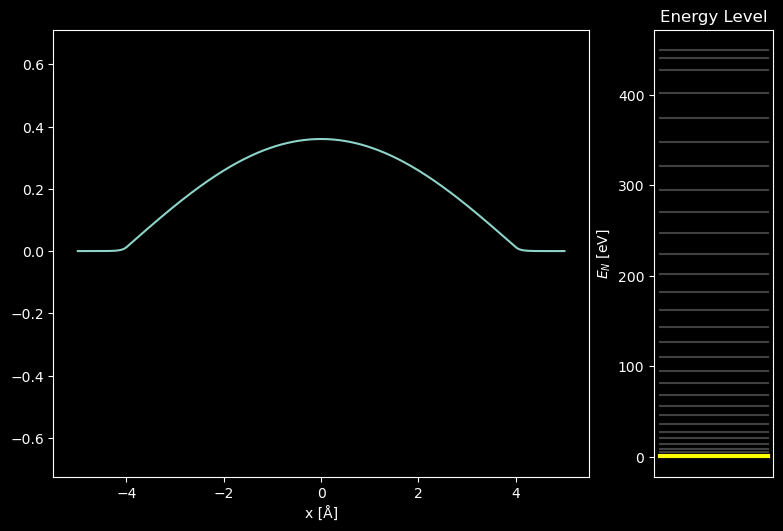

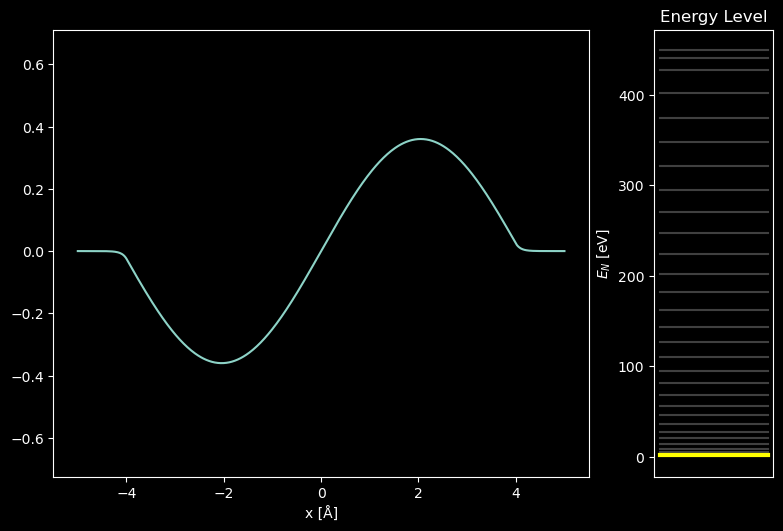

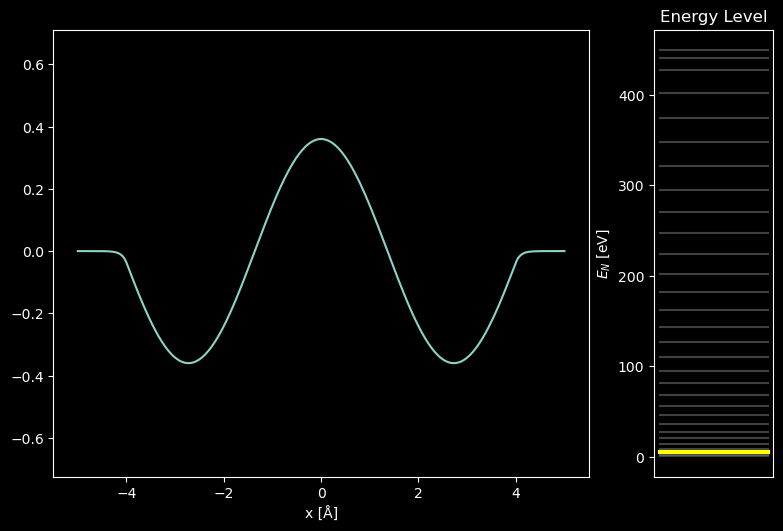

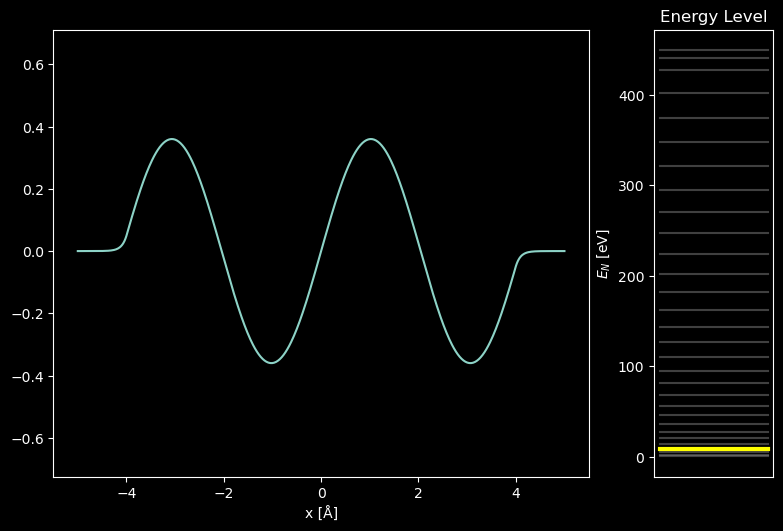

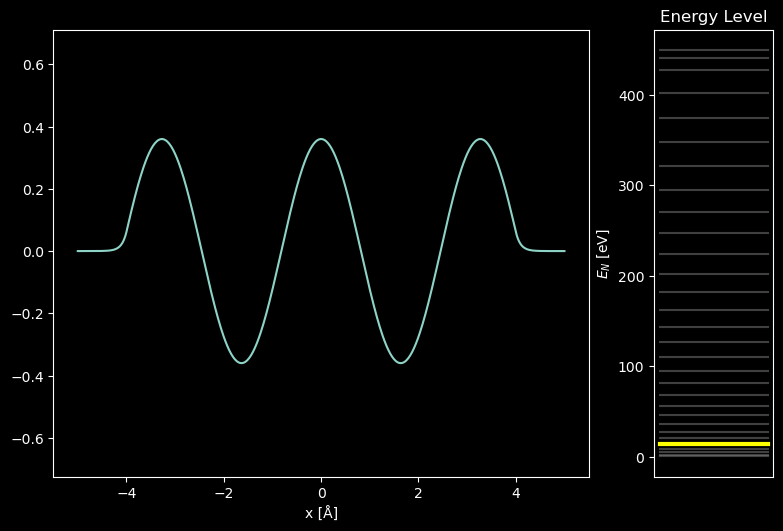

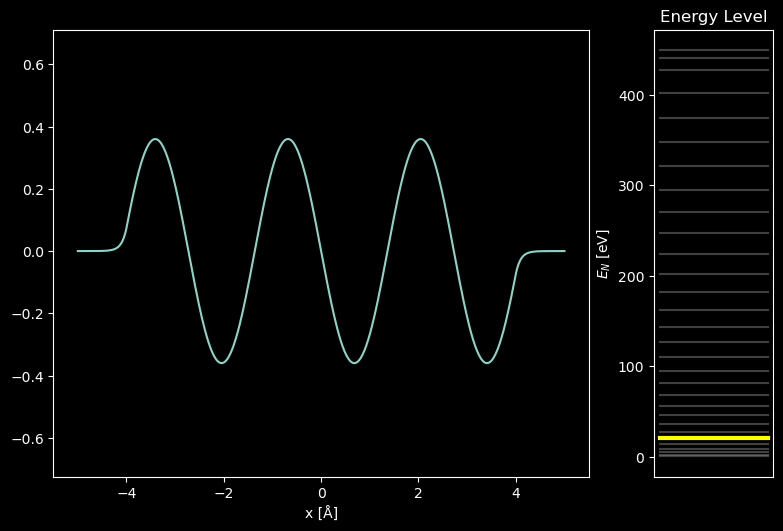

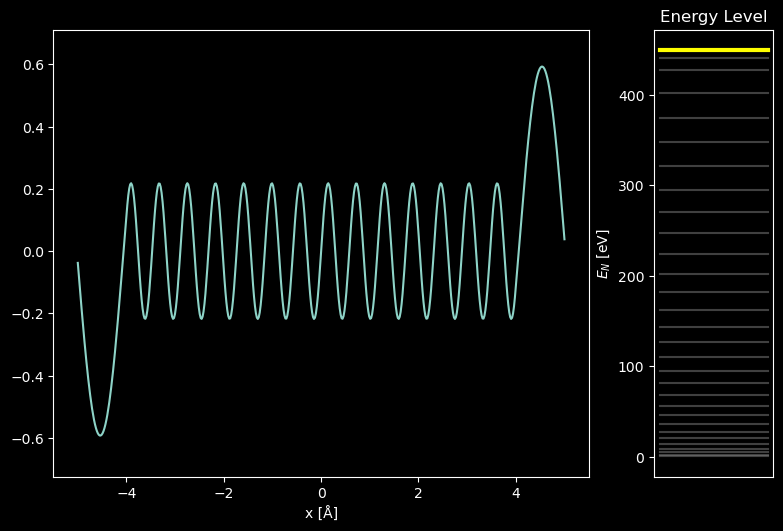

In [45]:
# Answer to Question 10.

# 8 angstrom-wide finite square well
def finite_square_well(particle):
    Vo = 15 # eV
    #Å = 8 Angstroms
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = Vo
    return potential

# Define the Hamiltonian of the finite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = finite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the finite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)
visualization_sw.plot_eigenstate(2)
visualization_sw.plot_eigenstate(3)
visualization_sw.plot_eigenstate(4)
visualization_sw.plot_eigenstate(5)
visualization_sw.plot_eigenstate(29)

Answer 11.) The plots show that the wavefunctions extend slightly past x<0 and x>L. In a finite square-well potential, quantum mechanics allows for a particle to escape the well if it has enough energy to clear the potential well barrier. This result is independent from a particle's quantum number n.